In [17]:
#@title Run on TensorFlow 2.x
%tensorflow_version 2.x
from __future__ import absolute_import, division, print_function, unicode_literals

UsageError: Line magic function `%tensorflow_version` not found.


In [19]:
#@title Import relevant modules
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers
from matplotlib import pyplot as plt

# The following lines adjust the granularity of reporting. 
pd.options.display.max_rows = 10
pd.options.display.float_format = "{:.1f}".format

# The following line improves formatting when ouputting NumPy arrays.
np.set_printoptions(linewidth = 200)

In [20]:
(x_train, y_train),(x_test, y_test) = tf.keras.datasets.mnist.load_data()

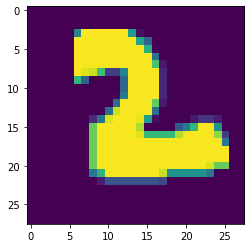

In [22]:
# Use false colors to visualize the array.
plt.imshow(x_train[2019])

In [23]:
# Output row #10 of example #2019.
x_train[2019][10]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  85, 253, 253, 253, 253,  27,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0], dtype=uint8)

In [24]:
# Output pixel #16 of row #10 of example #2019.
x_train[2019][10][16]

253

In [25]:
x_train_normalized = x_train / 255.0
x_test_normalized = x_test / 255.0
print(x_train_normalized[2019][10]) # Output a normalized row

[0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.33333333 0.99215686 0.99215686 0.99215686 0.99215686 0.10588235
 0.         0.         0.         0.         0.         0.         0.         0.         0.         0.        ]


In [26]:
#@title Define the plotting function
def plot_curve(epochs, hist, list_of_metrics):

  plt.figure()
  plt.xlabel("Epoch")
  plt.ylabel("Value")

  for m in list_of_metrics:
    x = hist[m]
    plt.plot(epochs[1:], x[1:], label=m)

  plt.legend()

print("Loaded the plot_curve function.")

Loaded the plot_curve function.


In [15]:
def create_model(my_learning_rate):
  
  model = tf.keras.models.Sequential()

  # The features arein a two-dimensional 28X28 array. 
  # Flatten that two-dimensional array into a a one-dimensional 
  # 784-element array.
  model.add(tf.keras.layers.Flatten(input_shape=(28, 28)))

   
  model.add(tf.keras.layers.Dense(units=32, activation='relu'))
  
  # Define a dropout regularization layer. 
  model.add(tf.keras.layers.Dropout(rate=0.2))

  model.add(tf.keras.layers.Dense(units=10, activation='softmax'))     
                           
  # Construct the layers into a model  
  model.compile(optimizer=tf.keras.optimizers.Adam(lr=my_learning_rate),
                loss="sparse_categorical_crossentropy",
                metrics=['accuracy'])
  
  return model    


def train_model(model, train_features, train_label, epochs,
                batch_size=None, validation_split=0.1):
  """Train the model by feeding it data."""
history = model.fit(x=train_features, y=train_label, batch_size=batch_size,
                      epochs=epochs, shuffle=True, 
                      validation_split=validation_split)
  
epochs = history.epoch
hist = pd.DataFrame(history.history)

return epochs, hist    

NameError: name 'model' is not defined

In [16]:
learning_rate = 0.005
epochs = 55
batch_size = 4000
validation_split = 0.2

my_model = create_model(learning_rate)

# Training the model on the normalized training set.
epochs, hist = train_model(my_model, x_train_normalized, y_train, 
                           epochs, batch_size, validation_split)

# graph of the metric vs. epochs.
list_of_metrics_to_plot = ['accuracy']
plot_curve(epochs, hist, list_of_metrics_to_plot)

# Evaluate against the test set.
print("\n Evaluate the new model against the test set:")
my_model.evaluate(x=x_test_normalized, y=y_test, batch_size=batch_size)

TypeError: cannot unpack non-iterable NoneType object